##  Seismische Wellen an einer Grenzfläche

Das folgende Skript zeigt das Verhalten einer P-Welle, die in einem bestimmten Winkel auf eine Grenzfläche zwischen zwei Schichten mit unterschiedlichen Geschwindigkeiten trifft. 
Geben Sie die gegebenen Geschwindigkeiten und den Einfallswinkel für Winkel, v1 und v2 ein, führen Sie die Code-Zelle  aus und speichern Sie die resultierende Abbildung (Rechtsklick auf die Abbildung -> Grafik speichern unter, oder als Screenshot). 
Beschriften Sie anschließend alle Strahlen. 

**Achtung:** x- und y-Achse sind hier aufgrund der besseren Darstellbarkeit nicht gleich skaliert !

Es steht Ihnen danach frei mit den Werten zu spielen.

Einfallswinkel =  35 °
Geschwindigkeit Schicht 1 =  2700  m/s
Geschwindigkeit Schicht 2 =  3700  m/s
.................


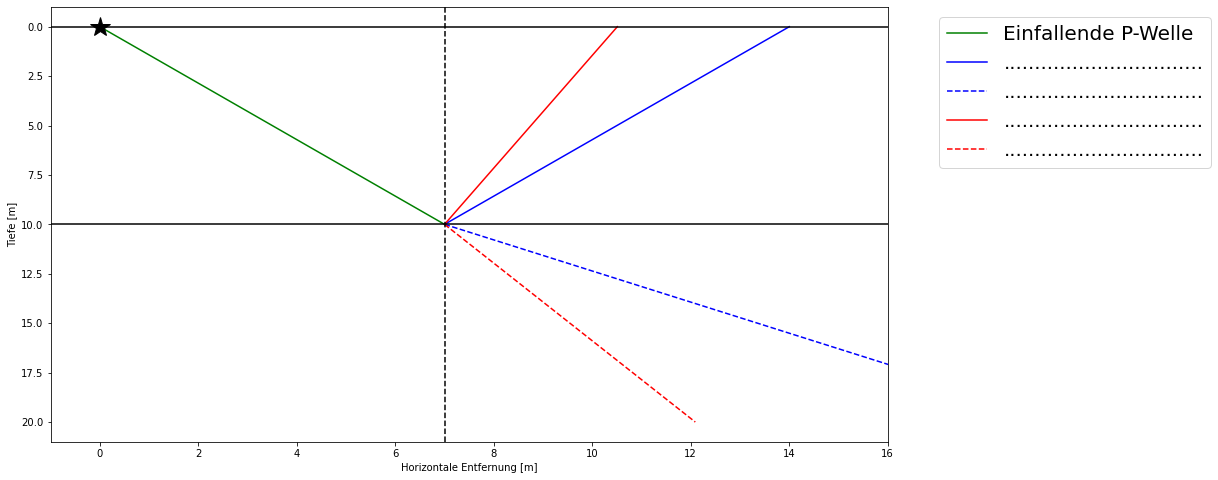

In [1]:
## Seismische Wellen an einer Grenzfläche
import numpy as np
import matplotlib.pyplot as plt

#- Fügen Sie hier ihre Werte hier ein und führen Sie die Zelle aus (Strg + Enter)   

#Winkel zwischen Strahl und Lot auf die Grenzfläche:

Winkel = 

# Geschwindigkeit der ersten Schicht in m/s:

v1 = 

# Geschwindigkeit der zweiten Schicht in m/s:

v2 =  

# ---------------------  ab hier nichts mehr ändern ---------------------------------

print('Einfallswinkel = ', Winkel,'°')
print('Geschwindigkeit Schicht 1 = ', v1, ' m/s')
print('Geschwindigkeit Schicht 2 = ', v2,' m/s' )
print('.................')
#print('Führen Sie die nächste Zelle aus!')


alpha_crit = np.rad2deg(np.arcsin(v1/v2))     
    
if Winkel==0 or Winkel >= alpha_crit: 
    print('Bitte Geben Sie einen Wert für "Winkel" zwischen 0° und', int(alpha_crit),'° und die Geschwindigkeiten ein!')

def get_all_alphas(alpha,d=10):
    if alpha[0] != 0:
        p = np.sin(alpha[0])/v[0]
    else:
        p = np.sin(alpha[2])/v[2]
    alpha[:] = np.arcsin(p*v[:])
    x = np.tan(alpha)*d
    x[np.isnan(x)] = 0
    return x


vp = np.array([v1,v2])
vs = vp/np.sqrt(3)
alpha_in = np.deg2rad(Winkel)
z = np.array([0,10,20])
v = np.hstack((vp,vs))

alpha = np.zeros(4)

alpha[0] = alpha_in # Ursprüngliche Welle ist P-Welle
#alpha[2] = alpha_in # Ursprüngliche Welle ist S-Welle

x0 = np.tan(alpha_in)*(z[1]-z[0])
#print(x0)
plt.figure(figsize=(15,8))
if alpha[0]!=0:
    plt.plot([0,x0],[z[0],z[1]],'g-',label = 'Einfallende P-Welle')
else:
    plt.plot([0,x0],[z[0],z[1]],'g-',label = 'Einfallende S-Welle')
    

x = get_all_alphas(alpha,z[2]-z[1])
#print(x)

plt.plot([x0,x0+x[0]],[z[1],z[0]],'b-',label = '................................') 
plt.plot([x0,x0+x[1]],[z[1],z[2]],'b--',label = '................................') 
plt.plot([x0,x0+x[2]],[z[1],z[0]],'r-',label = '................................') 
plt.plot([x0,x0+x[3]],[z[1],z[2]],'r--',label = '................................') 

plt.axvline(x0,color='k',linestyle = '--')
plt.axhline(z[1],color='k',linestyle='-')
plt.axhline(z[0],color='k',linestyle='-')
plt.plot(0,0,'k*',markersize=20)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',prop={'size': 20})
plt.xlim([-1,16])
plt.gca().invert_yaxis()
plt.xlabel('Horizontale Entfernung [m]')
plt.ylabel('Tiefe [m]')
#plt.grid('off')
#plt.axis('equal') 
plt.show()

